In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Räumliche Gliederung
## Bund

In [7]:
R_BU_T01_F = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T01-Faelle.xlsx'
df = pd.read_excel(R_BU_T01_F,skiprows=3,thousands=',',decimal='.')
df = df.rename(columns={'erfasste Fälle davon:\nVersuche':'erfasste Fälle davon: Anzahl Versuche',
           'Unnamed: 5':'erfasste Fälle davon: Versuche in %',
           'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
           'Unnamed: 7':'Tatortverteilung: 20.000 bis unter 100.000',
           'Unnamed: 8':'Tatortverteilung: 100.000 bis unter 500.000',
           'Unnamed: 9':'Tatortveteilung: 500.000 und mehr',
           'Unnamed: 10':'Tatortverteilung: unbekannt',
           'mit Schusswaffe':'mit Schusswaffe: gedroht',
           'Unnamed: 12':'mit Schusswaffe: geschossen',
           'Aufklärung':'Aufklärung: Anzahl Fälle',
           'Unnamed: 14':'Aufklärung: in % (AQ)',
           'Tatverdächtige':'Tatverdächtige: insgesamt',
           'Unnamed: 16':'Tatverdächtige: männlich',
           'Unnamed: 17':'Tatverdächtige: weiblich',
           'Nichtdeutsche Tatverdächtige':'Nichtdeutsche Tatverdächtige: Anzahl',
           'Unnamed: 19':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'})
df = df.drop(range(4)).reset_index(drop=True)
aggregate_rows = ~df.Schlüssel.str.contains('\*') # bool array: false where '*' is contained in key
summary_official = df.iloc[0,2:]
sum_rows = [number for r in [range(2,5),range(6,14),range(15,19)] for number in r] # flatten list of ranges to numbers
mean_rows = [5,14,19]
sum_check = df[aggregate_rows].iloc[1:,sum_rows].sum(axis=0) 
mean_check = df[aggregate_rows].iloc[1:,mean_rows].mean(axis=0)
print(summary_official)
print(sum_check)
print(mean_check)
df.head()

Anzahl erfasste Fälle                                    5628584.0
%-Anteil an allen Fällen                                     100.0
erfasste Fälle davon: Anzahl Versuche                       414197
erfasste Fälle davon: Versuche in %                            7.4
Tatortverteilung: bis unter 20.000 Einwohner               1304904
Tatortverteilung: 20.000 bis unter 100.000                 1508727
Tatortverteilung: 100.000 bis unter 500.000                1099424
Tatortveteilung: 500.000 und mehr                          1572975
Tatortverteilung: unbekannt                                 142554
mit Schusswaffe: gedroht                                      4092
mit Schusswaffe: geschossen                                   4442
Aufklärung: Anzahl Fälle                                   3226935
Aufklärung: in % (AQ)                                         57.3
Tatverdächtige: insgesamt                                  2093782
Tatverdächtige: männlich                                   156

,Schlüssel,Straftat,Anzahl erfasste Fälle,%-Anteil an allen Fällen,erfasste Fälle davon: Anzahl Versuche,erfasste Fälle davon: Versuche in %,Tatortverteilung: bis unter 20.000 Einwohner,Tatortverteilung: 20.000 bis unter 100.000,Tatortverteilung: 100.000 bis unter 500.000,Tatortveteilung: 500.000 und mehr,Tatortverteilung: unbekannt,mit Schusswaffe: gedroht,mit Schusswaffe: geschossen,Aufklärung: Anzahl Fälle,Aufklärung: in % (AQ),Tatverdächtige: insgesamt,Tatverdächtige: männlich,Tatverdächtige: weiblich,Nichtdeutsche Tatverdächtige: Anzahl,Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %
0,------,Straftaten insgesamt,5628584.0,100.0,414197,7.4,1304904,1508727,1099424,1572975,142554,4092,4442,3226935,57.3,2093782,1565240,528542,783876,37.4
1,000000,Straftaten gegen das Leben,3077.0,0.1,1770,57.5,887,974,566,635,15,8,133,2732,88.8,3539,2950,589,1270,35.9
2,010000,Mord § 211 StGB,662.0,0.0,451,68.1,205,160,122,166,9,3,59,604,91.2,763,654,109,293,38.4
3,010079,Sonstiger Mord,625.0,0.0,425,68,192,155,114,155,9,3,55,570,91.2,711,604,107,269,37.8
4,011000,Mord im Zusammenhang mit Raubdelikten,29.0,0.0,23,79.3,11,4,6,8,0,0,4,26,89.7,46,44,2,23,50


In [8]:
R_BU_T01_T = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T01-Tatortverteilung-Prozent.xlsx'
df = pd.read_excel(R_BU_T01_T,skiprows=3,thousands=',',decimal='.')
df = df.rename(columns={'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
                        'Unnamed: 4':'Tatortverteilung: 20.000 bis unter 100.000',
                        'Unnamed: 5':'Tatortverteilung: 100.000 bis unter 500.000',
                        'Unnamed: 6':'Tatortverteilung: 500.000 und mehr',
                        'Unnamed: 7':'Tatortverteilung: unbekannt'})
inhabitant_distribution = df.iloc[4,3:].rename('Einwohnerverteilung (01.01.2022) in %')
print(inhabitant_distribution)
df = df.drop(range(5)).reset_index(drop=True)
df.head()

Tatortverteilung: bis unter 20.000 Einwohner    40.576384
Tatortverteilung: 20.000 bis unter 100.000      27.494591
Tatortverteilung: 100.000 bis unter 500.000     15.072914
Tatortverteilung: 500.000 und mehr              16.856111
Tatortverteilung: unbekannt                             x
Name: Einwohnerverteilung (01.01.2022) in %, dtype: object


,Schlüssel,Straftat,Anzahl erfasste Fälle,Tatortverteilung: bis unter 20.000 Einwohner,Tatortverteilung: 20.000 bis unter 100.000,Tatortverteilung: 100.000 bis unter 500.000,Tatortverteilung: 500.000 und mehr,Tatortverteilung: unbekannt
0,------,Straftaten insgesamt,5628584,23.183522,26.804735,19.53287,27.946194,2.53268
1,000000,Straftaten gegen das Leben,3077,28.826779,31.654209,18.39454,20.636984,0.487488
2,010000,Mord § 211 StGB,662,30.966767,24.169184,18.429003,25.075529,1.359517
3,010079,Sonstiger Mord,625,30.72,24.8,18.24,24.8,1.44
4,011000,Mord im Zusammenhang mit Raubdelikten,29,37.931034,13.793103,20.689655,27.586207,0


In [11]:
R_BU_T01_V = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T01-vollendete-Faelle.xlsx'
df = pd.read_excel(R_BU_T01_F,skiprows=3,thousands=',',decimal='.')
df = df.rename(columns={'erfasste Fälle davon:\nVersuche':'erfasste Fälle davon: Anzahl Versuche',
           'Unnamed: 5':'erfasste Fälle davon: Versuche in %',
           'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
           'Unnamed: 7':'Tatortverteilung: 20.000 bis unter 100.000',
           'Unnamed: 8':'Tatortverteilung: 100.000 bis unter 500.000',
           'Unnamed: 9':'Tatortveteilung: 500.000 und mehr',
           'Unnamed: 10':'Tatortverteilung: unbekannt',
           'mit Schusswaffe':'mit Schusswaffe: gedroht',
           'Unnamed: 12':'mit Schusswaffe: geschossen',
           'Aufklärung':'Aufklärung: Anzahl Fälle',
           'Unnamed: 14':'Aufklärung: in % (AQ)',
           'Tatverdächtige':'Tatverdächtige: insgesamt',
           'Unnamed: 16':'Tatverdächtige: männlich',
           'Unnamed: 17':'Tatverdächtige: weiblich',
           'Nichtdeutsche Tatverdächtige':'Nichtdeutsche Tatverdächtige: Anzahl',
           'Unnamed: 19':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'})
df = df.drop(range(4)).reset_index(drop=True)
df.head()

,Schlüssel,Straftat,Anzahl erfasste Fälle,%-Anteil an allen Fällen,erfasste Fälle davon: Anzahl Versuche,erfasste Fälle davon: Versuche in %,Tatortverteilung: bis unter 20.000 Einwohner,Tatortverteilung: 20.000 bis unter 100.000,Tatortverteilung: 100.000 bis unter 500.000,Tatortveteilung: 500.000 und mehr,Tatortverteilung: unbekannt,mit Schusswaffe: gedroht,mit Schusswaffe: geschossen,Aufklärung: Anzahl Fälle,Aufklärung: in % (AQ),Tatverdächtige: insgesamt,Tatverdächtige: männlich,Tatverdächtige: weiblich,Nichtdeutsche Tatverdächtige: Anzahl,Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %
0,------,Straftaten insgesamt,5628584.0,100.0,414197,7.4,1304904,1508727,1099424,1572975,142554,4092,4442,3226935,57.3,2093782,1565240,528542,783876,37.4
1,000000,Straftaten gegen das Leben,3077.0,0.1,1770,57.5,887,974,566,635,15,8,133,2732,88.8,3539,2950,589,1270,35.9
2,010000,Mord § 211 StGB,662.0,0.0,451,68.1,205,160,122,166,9,3,59,604,91.2,763,654,109,293,38.4
3,010079,Sonstiger Mord,625.0,0.0,425,68,192,155,114,155,9,3,55,570,91.2,711,604,107,269,37.8
4,011000,Mord im Zusammenhang mit Raubdelikten,29.0,0.0,23,79.3,11,4,6,8,0,0,4,26,89.7,46,44,2,23,50


# Zeitliche Gliederung

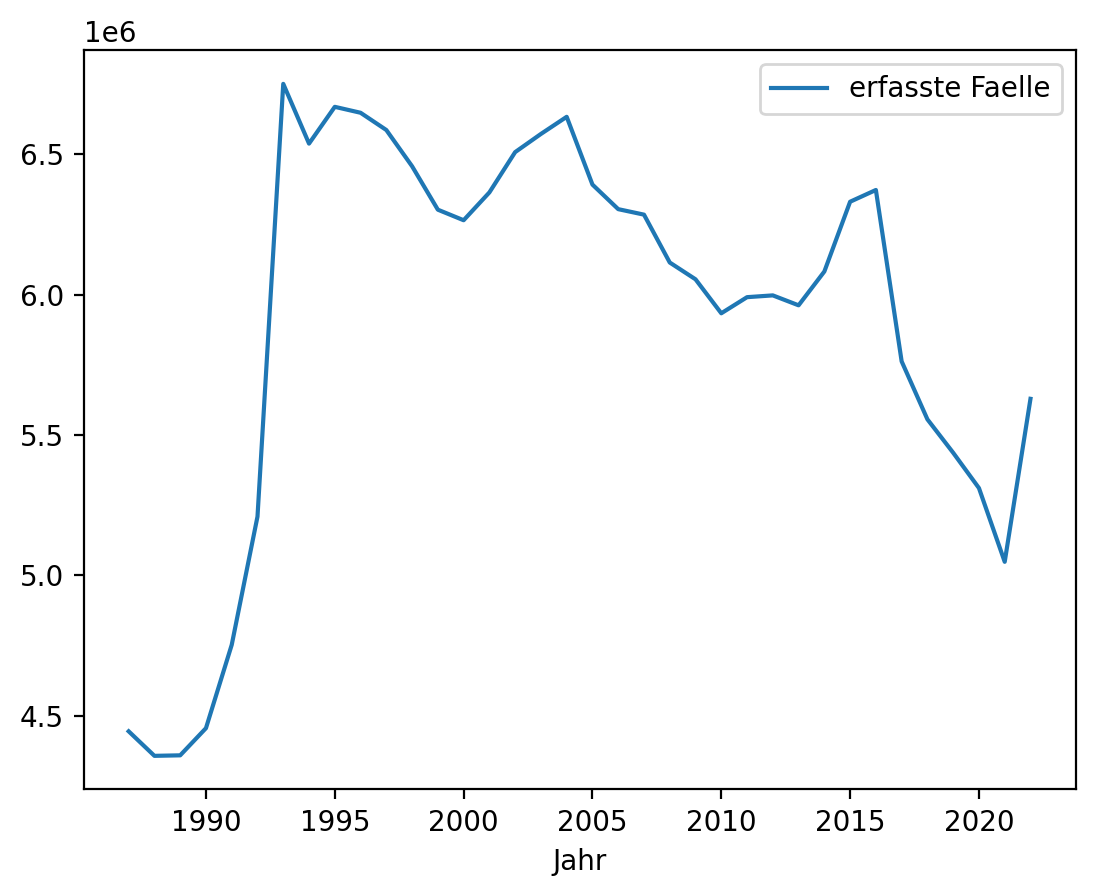

In [9]:
Z_T01_F = 'Datasets/PKS/2022/Zeitliche-Gliederung/T01-Faelle.csv'
df = pd.read_csv(Z_T01_F,sep=';',encoding=' iso8859-1',skiprows=1,thousands=',',decimal='.')
total = df[df.Straftat == 'Straftaten insgesamt']
total.plot(x='Jahr',y='erfasste Faelle')
plt.show()

,Monat,Straftaten insgesamt
0,Jan.,421337
1,Febr.,390520
2,März,456125
3,April,438373
4,Mai,492336
5,Juni,476460
6,Juli,470170
7,Aug.,467760
8,Sept.,451006
9,Okt.,467533


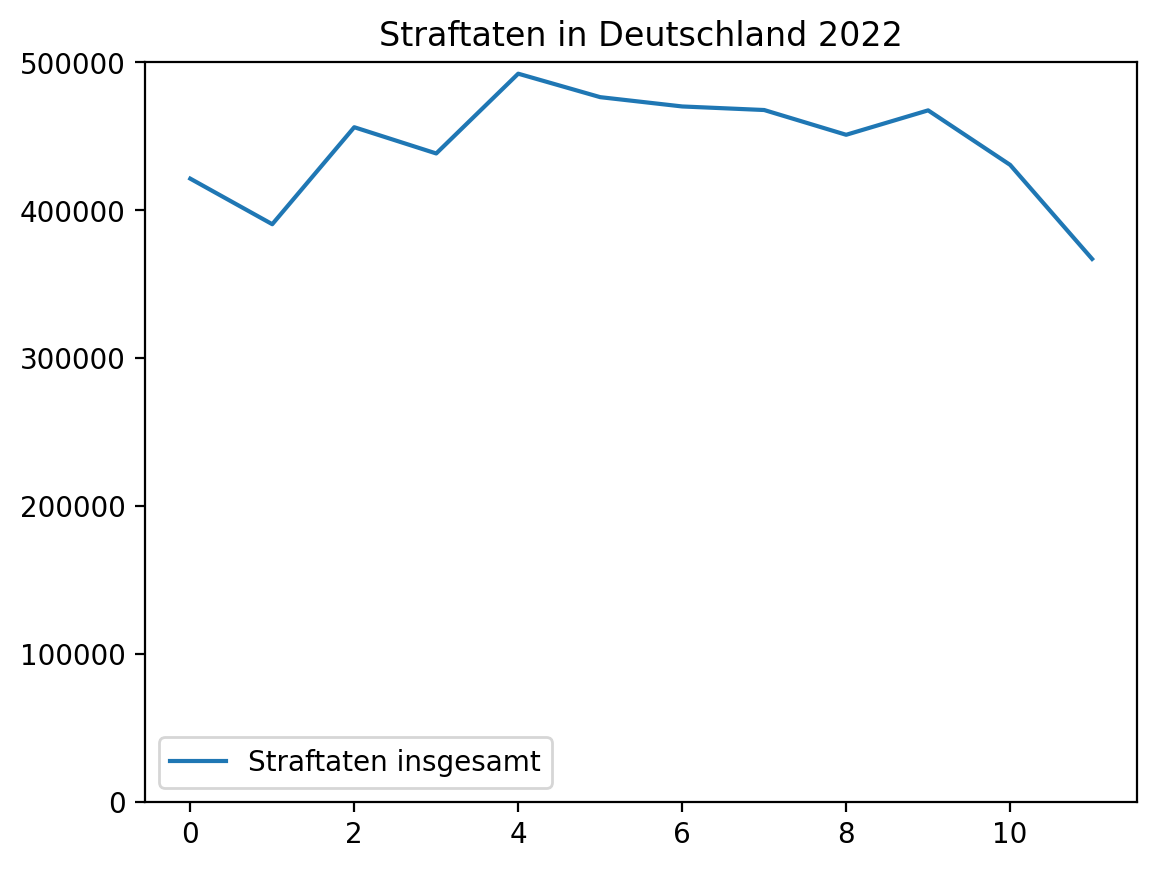

In [10]:
R_BU_T08_T = 'Datasets/PKS/2022/Räumliche-Gliederung/Bund/BU-T08-Tatzeit.xlsx'
df = pd.read_excel(R_BU_T08_T,skiprows=4,thousands=',',decimal='.')
df.columns.values[3:15] = df.iloc[0,3:15]
df = df.drop([0,1]).reset_index(drop=True)
total = df[df.Straftat == 'Straftaten insgesamt']
total = pd.melt(total.iloc[:,3:-3],var_name='Monat',value_name='Straftaten insgesamt')
ax = total.plot()
plt.title('Straftaten in Deutschland 2022')
ax.set_ylim(0,5e5)
total